In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
import re

              Location                 Type  Rooms  Bathrooms  Car Parks  \
0                 KLCC   Serviced Residence      3        3.0        2.0   
1              Dutamas          Condominium      3        4.0        2.0   
2          Bukit Jalil          Condominium      5        3.0        2.0   
3  Taman Tun Dr Ismail             Bungalow      6        5.0        4.0   
4  Taman Tun Dr Ismail  Semi-detached House      5        4.0        4.0   

   Size        Furnishing  Storeys Position    Price  
0  1335   Fully Furnished        1  Unknown  1250000  
1  1875  Partly Furnished        1   Corner  1030000  
2  1513  Partly Furnished        1   Corner   900000  
3  7200  Partly Furnished        1  Unknown  5350000  
4  3600  Partly Furnished        1  Unknown  2600000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28960 entries, 0 to 28959
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    28960

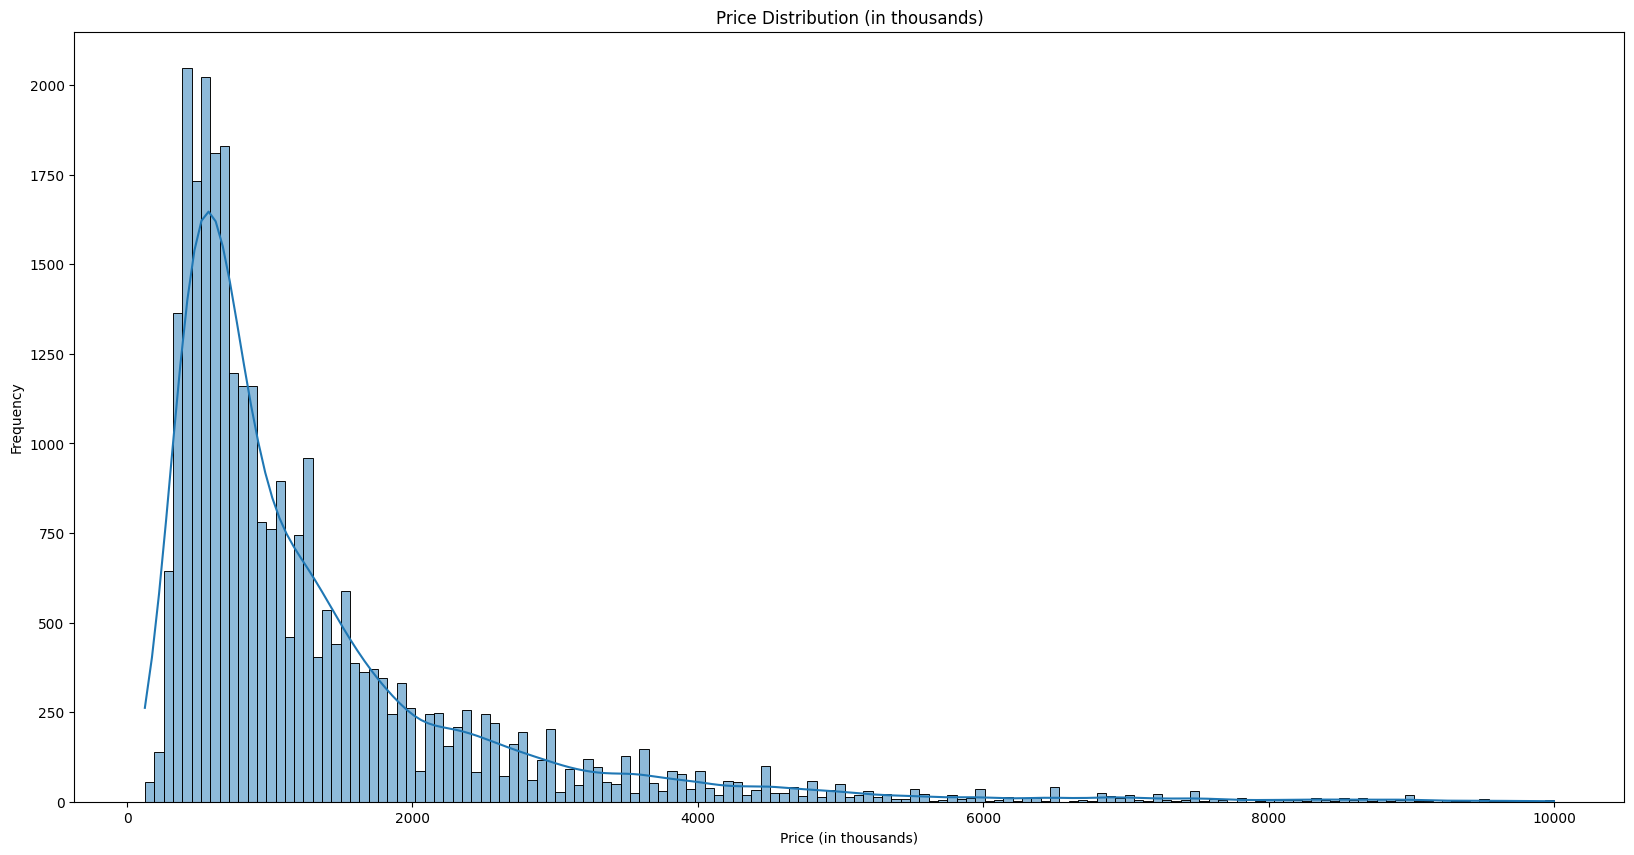

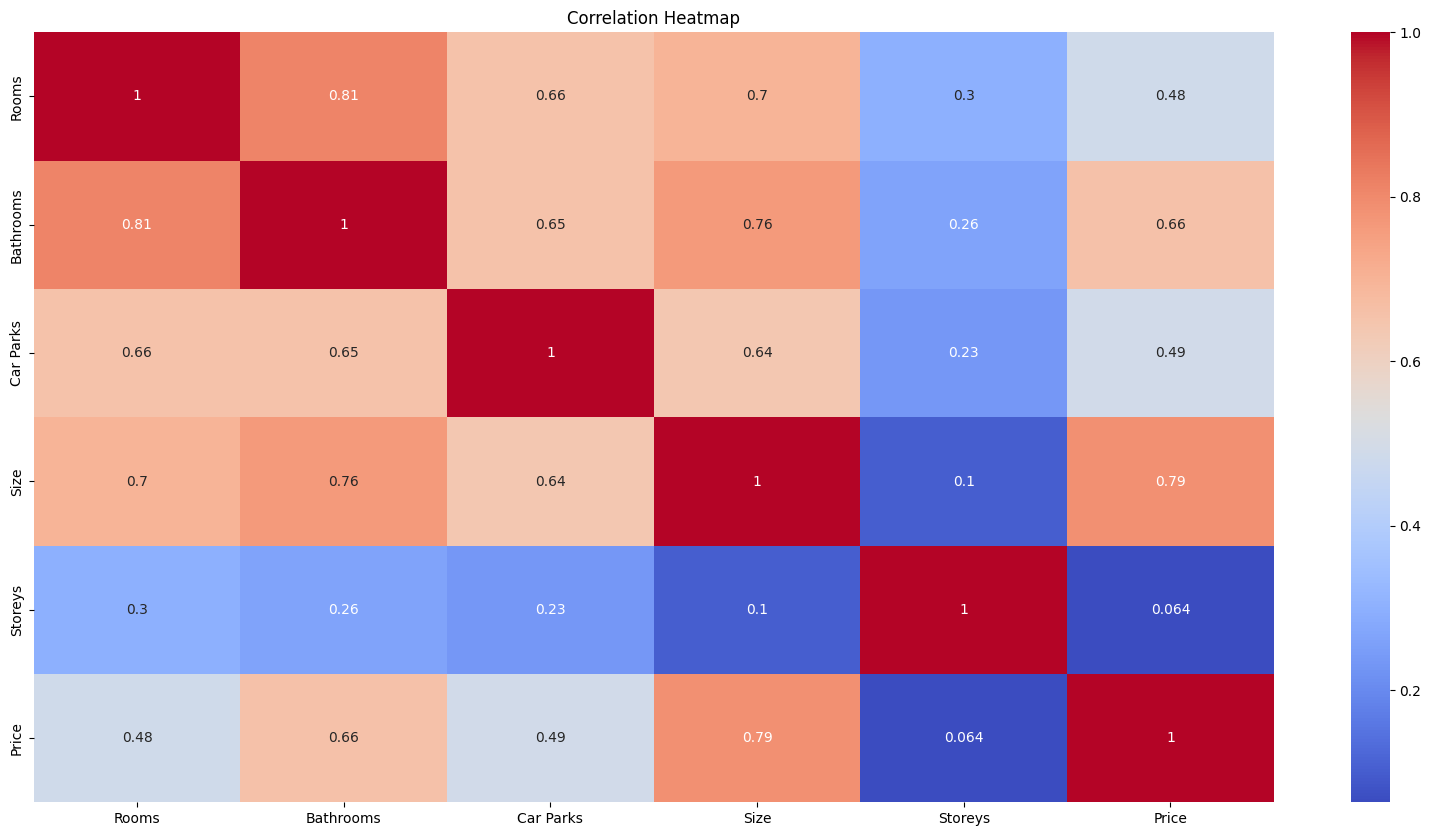

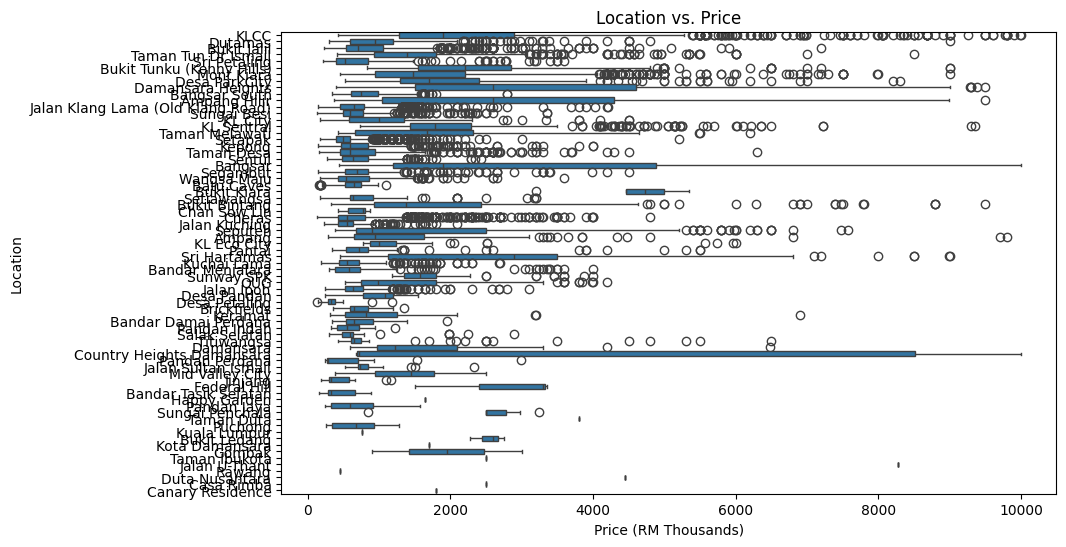

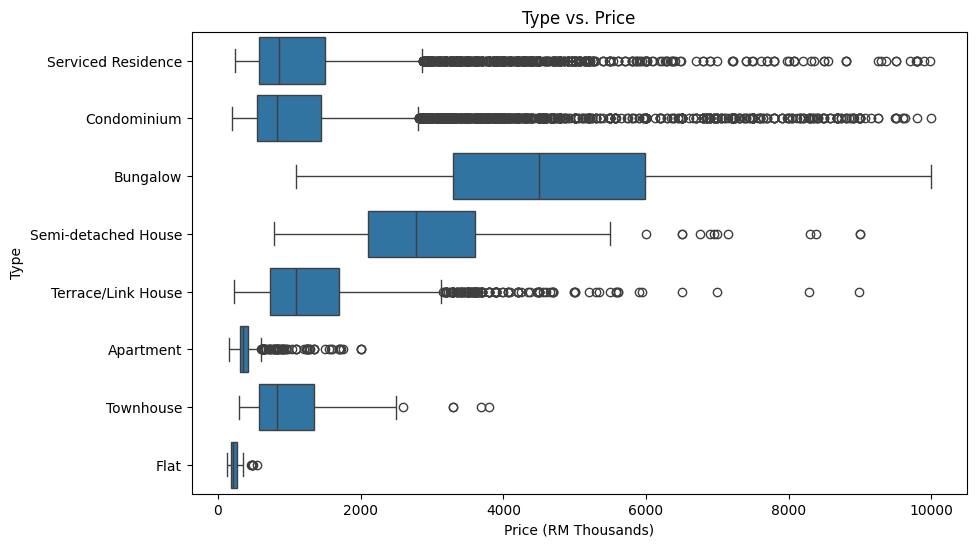

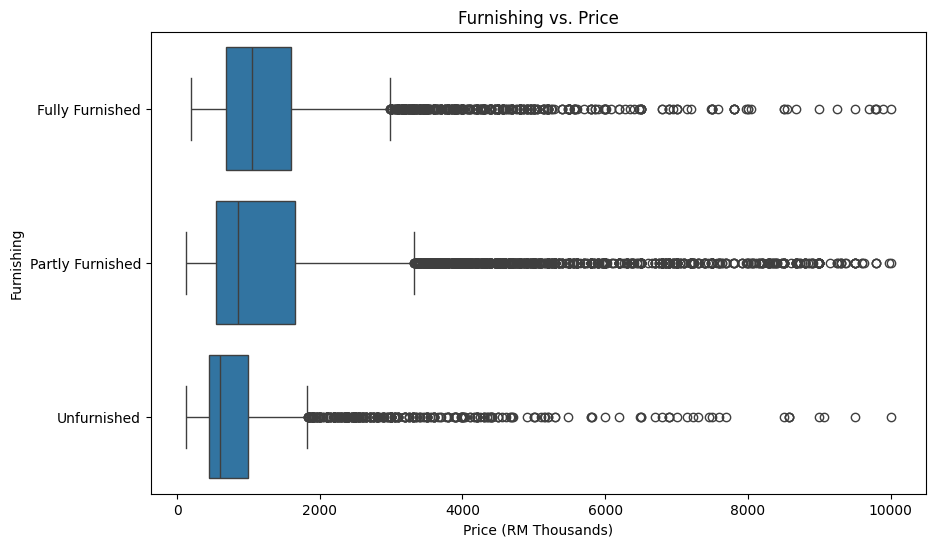

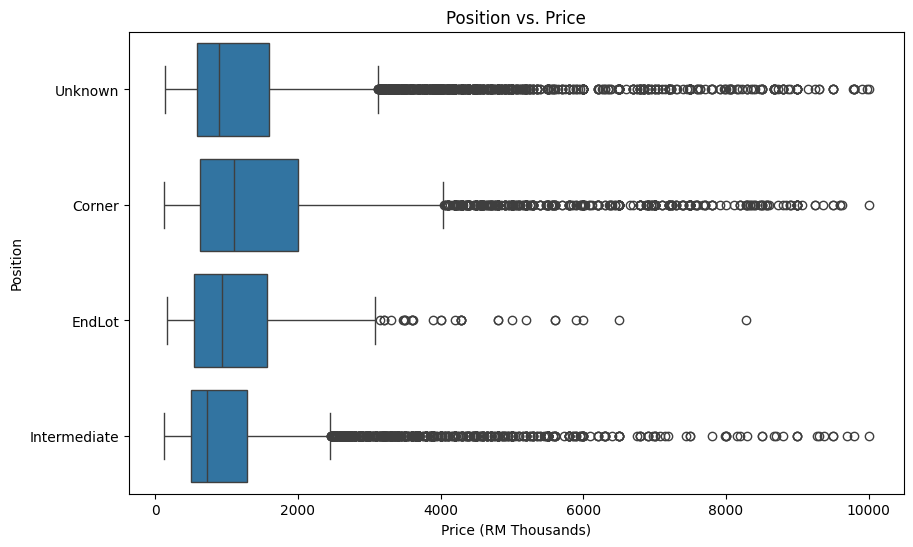

In [3]:
# Load the data
df = pd.read_csv('../data/cleaned_data_final.csv')

# Basic exploration
print(df.head())  # View first few rows
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics for numerical features

# Check for missing values
print(df.isnull().sum())

# Visualize distributions
sns.histplot(df['Price']/1000, kde=True)
plt.title('Price Distribution (in thousands)')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical features
numerical_cols = ['Rooms', 'Bathrooms', 'Car Parks', 'Size', 'Storeys']
corr = df[numerical_cols + ['Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for categorical vs. Price (vertical orientation)
categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=col, x=df['Price']/1000, data=df)  # Swapped x and y, divided Price by 1000
    plt.title(f'{col} vs. Price')
    plt.xlabel('Price (RM Thousands)')  # Updated label to show thousands
    plt.ylabel(col)
    plt.show()
# Boxplots for categorical vs. Price
#categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']
#for col in categorical_cols:
    #sns.boxplot(x=col, y='Price', data=df)
   # plt.title(f'{col} vs. Price')
    #plt.xticks(rotation=45)
    #plt.show()

In [4]:
# Print column names from df
print("Column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Optional: print data types alongside
print("\nColumn names with their data types:")
print(df.dtypes)


Column names in the dataset:
1. Location
2. Type
3. Rooms
4. Bathrooms
5. Car Parks
6. Size
7. Furnishing
8. Storeys
9. Position
10. Price

Column names with their data types:
Location       object
Type           object
Rooms           int64
Bathrooms     float64
Car Parks     float64
Size            int64
Furnishing     object
Storeys         int64
Position       object
Price           int64
dtype: object


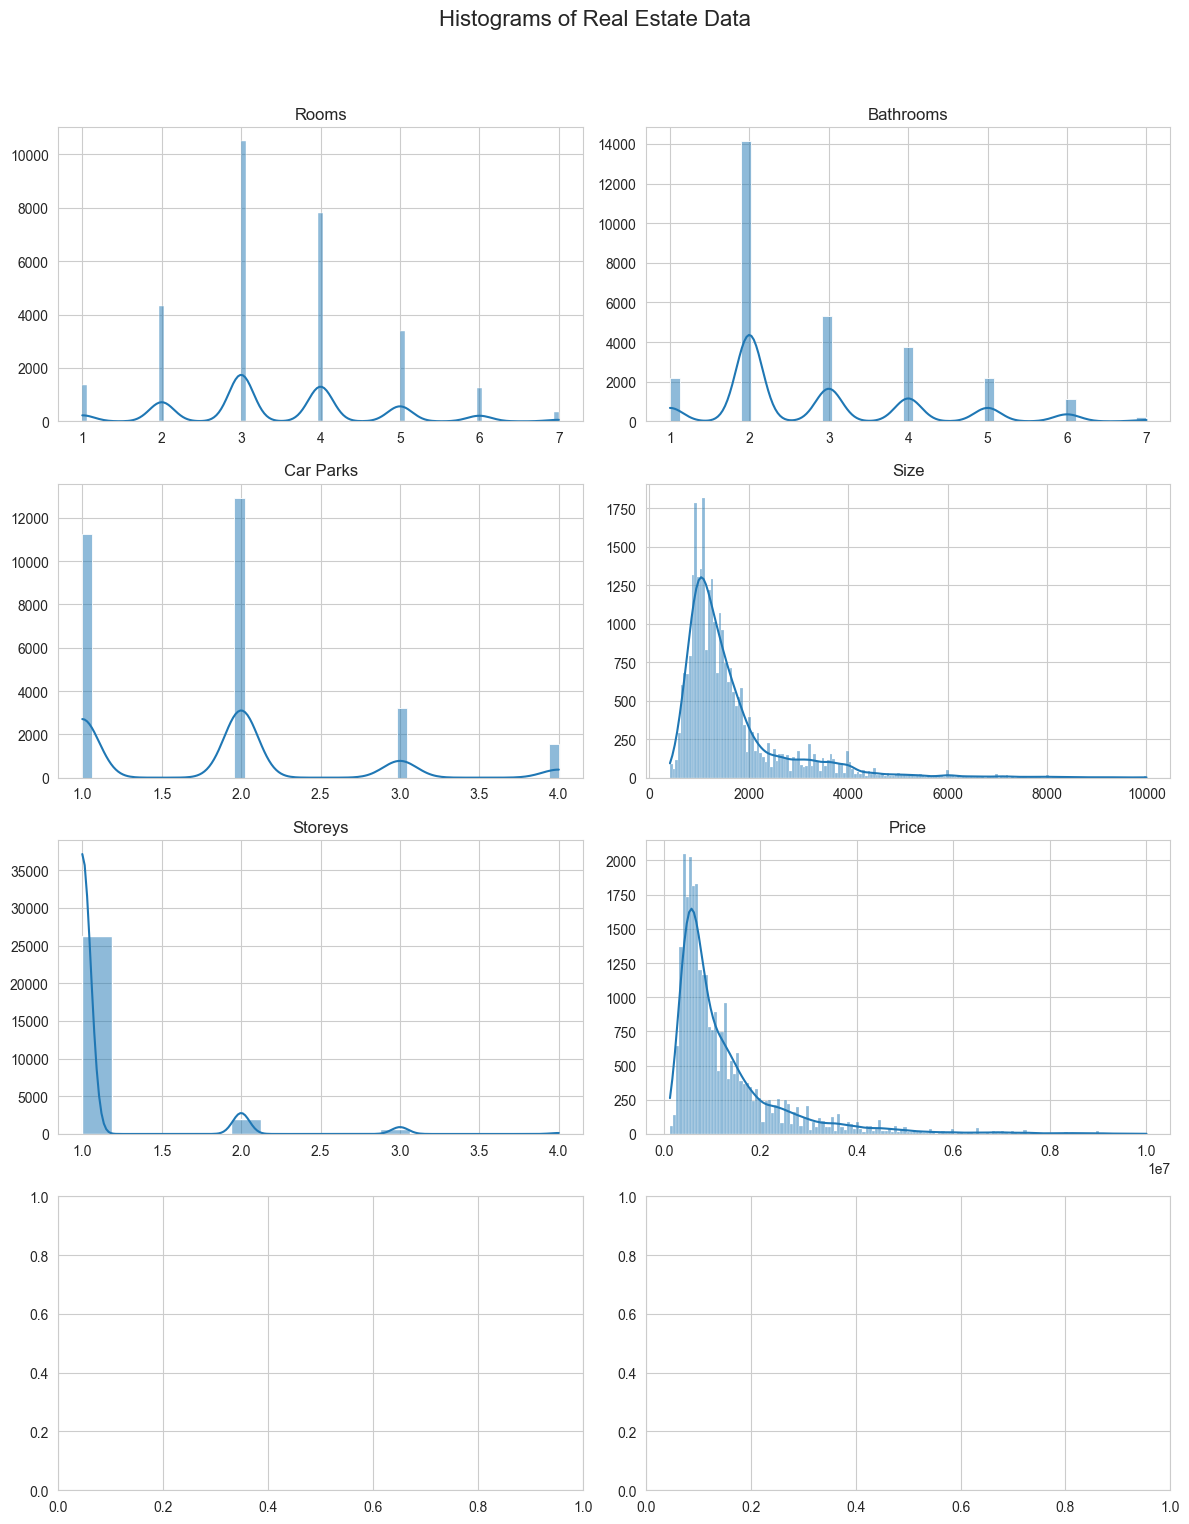

In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # Changed to 4x2 grid
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['Rooms','Bathrooms', 'Car Parks', 'Size', 'Storeys', 'Price']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

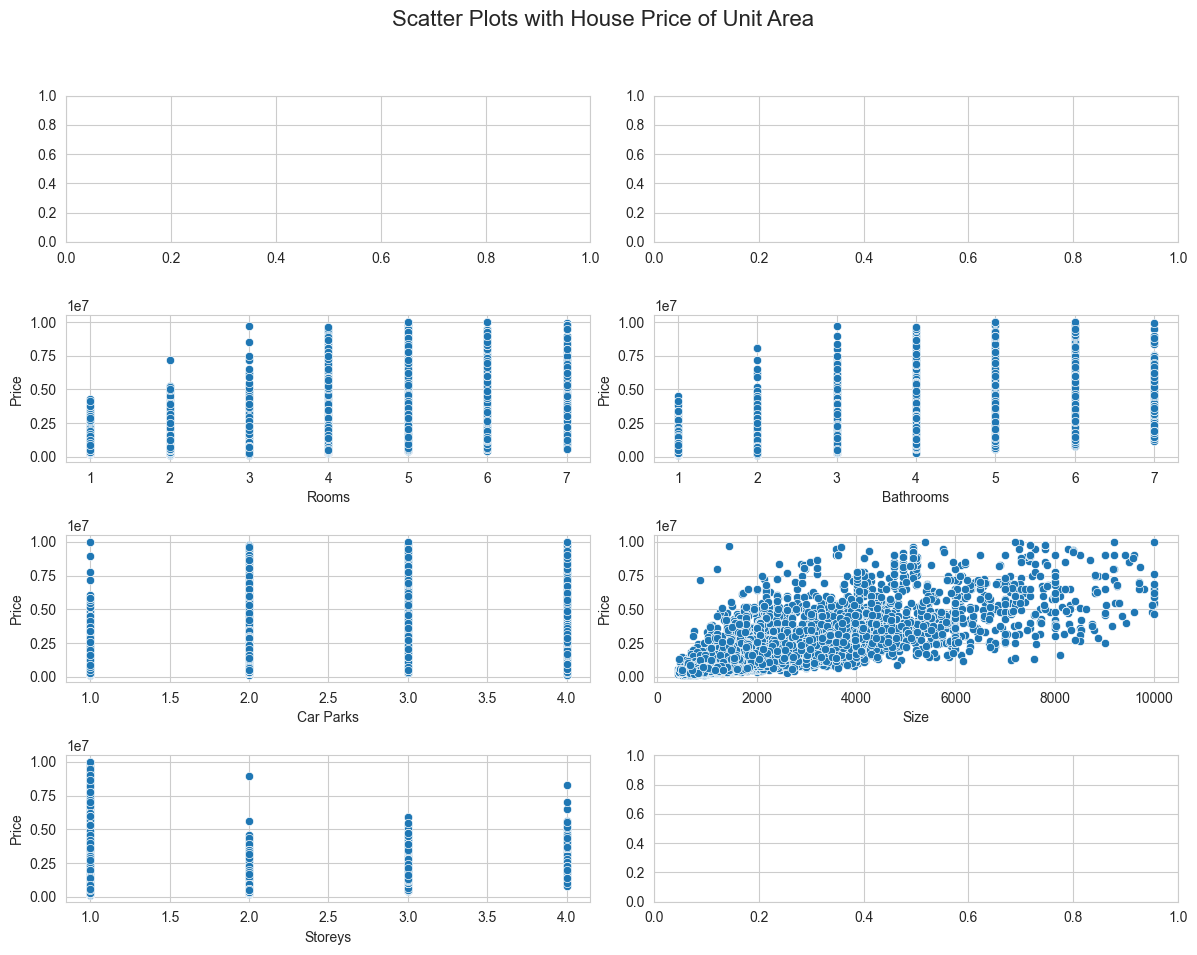

In [7]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price

sns.scatterplot(data=df, x='Rooms', y='Price', ax=axes[1, 0])
sns.scatterplot(data=df, x='Bathrooms', y='Price', ax=axes[1, 1])
sns.scatterplot(data=df, x='Car Parks', y='Price', ax=axes[2, 0])
sns.scatterplot(data=df, x='Size', y='Price', ax=axes[2, 1])
sns.scatterplot(data=df, x='Storeys', y='Price', ax=axes[3, 0])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Remove Outliers 



In [8]:


# Assuming 'df' has columns 'Type', 'Location', 'Furnishing', 'Position', and 'Price'
def remove_outliers_by_group(df, group_col, value_col):
    df_cleaned = df.copy()
    for group in df_cleaned[group_col].unique():
        temp_df = df_cleaned[df_cleaned[group_col] == group]
        Q1 = temp_df[value_col].quantile(0.25)
        Q3 = temp_df[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.0 * IQR  # Stricter multiplier (1.0 instead of 1.5)
        upper_bound = Q3 + 1.0 * IQR
        # Cap the values instead of removing them completely
        df_cleaned.loc[df_cleaned[group_col] == group, value_col] = temp_df[value_col].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned

# Apply the function to remove outliers for each categorical variable
df = remove_outliers_by_group(df, 'Type', 'Price')
df = remove_outliers_by_group(df, 'Location', 'Price')
df = remove_outliers_by_group(df, 'Furnishing', 'Price')
df = remove_outliers_by_group(df, 'Position', 'Price')

              Location                 Type  Rooms  Bathrooms  Car Parks  \
0                 KLCC   Serviced Residence      3        3.0        2.0   
1              Dutamas          Condominium      3        4.0        2.0   
2          Bukit Jalil          Condominium      5        3.0        2.0   
3  Taman Tun Dr Ismail             Bungalow      6        5.0        4.0   
4  Taman Tun Dr Ismail  Semi-detached House      5        4.0        4.0   

   Size        Furnishing  Storeys Position    Price  
0  1335   Fully Furnished        1  Unknown  1250000  
1  1875  Partly Furnished        1   Corner  1030000  
2  1513  Partly Furnished        1   Corner   900000  
3  7200  Partly Furnished        1  Unknown  2420000  
4  3600  Partly Furnished        1  Unknown  2420000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28960 entries, 0 to 28959
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    28960

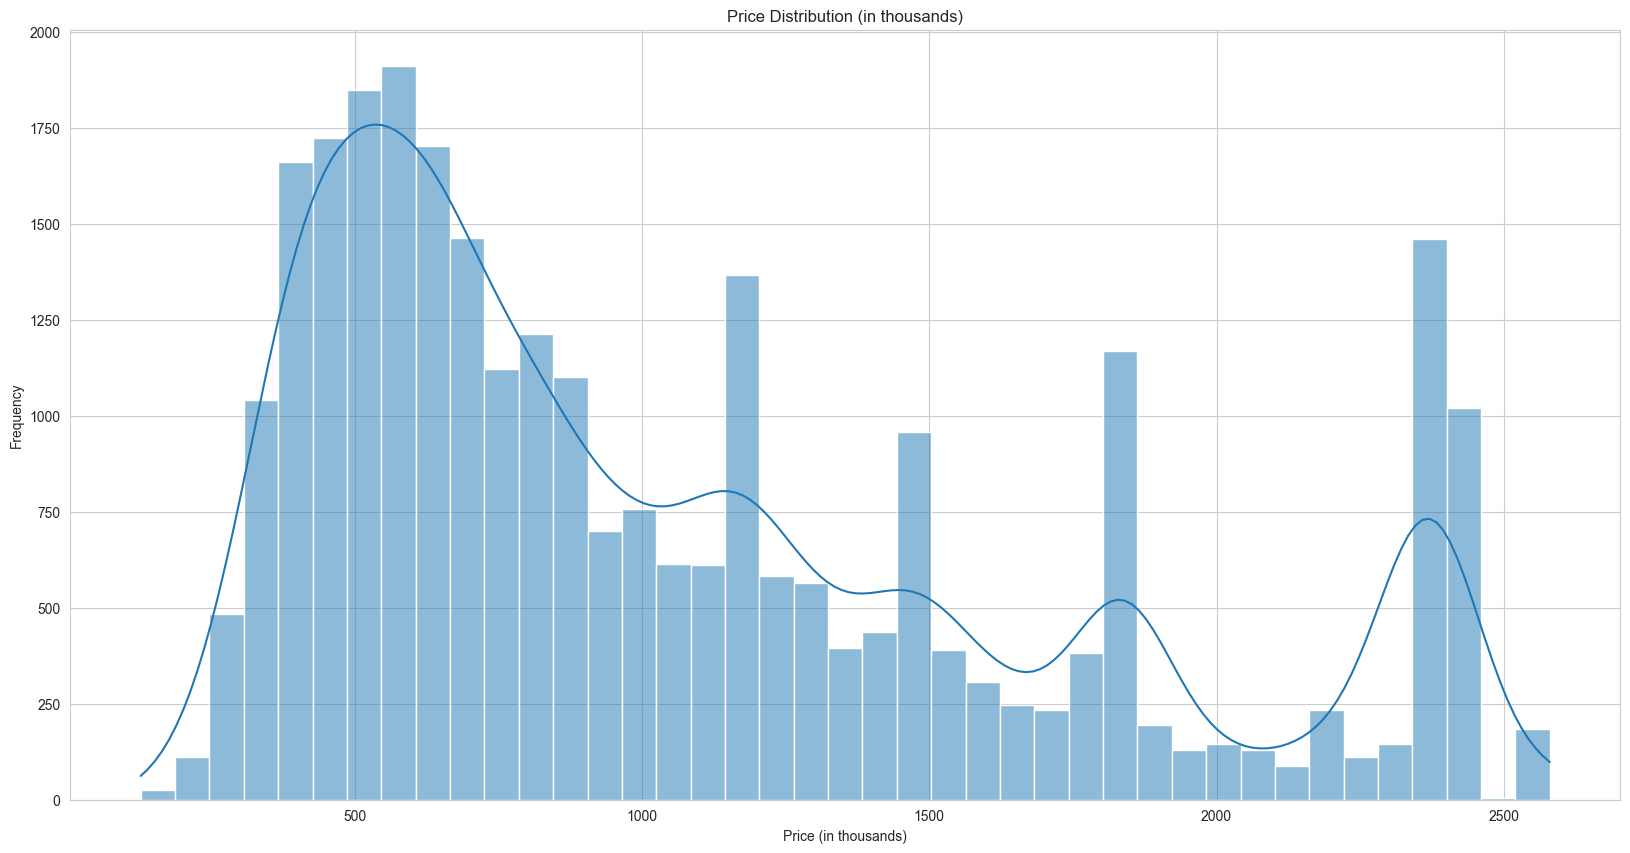

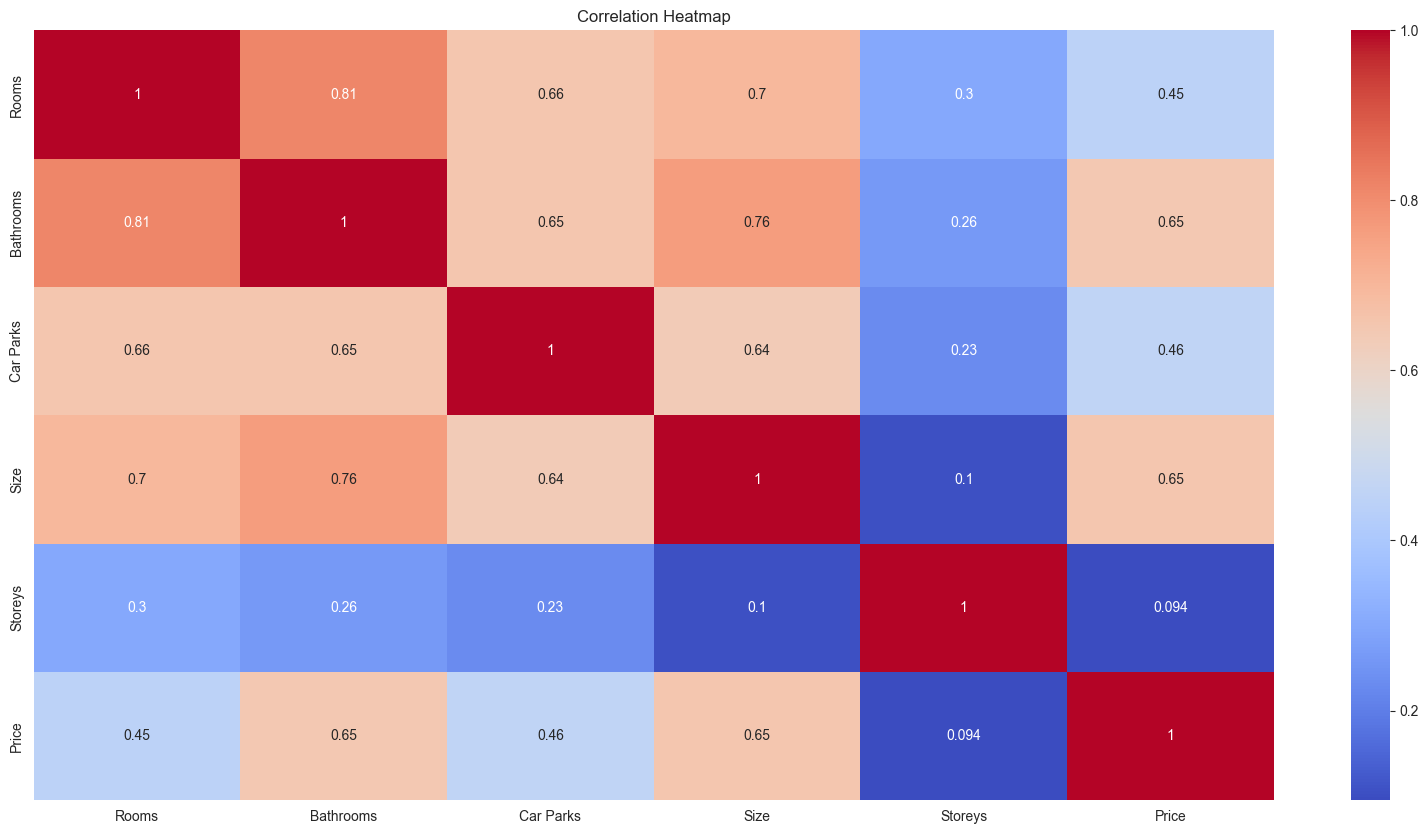

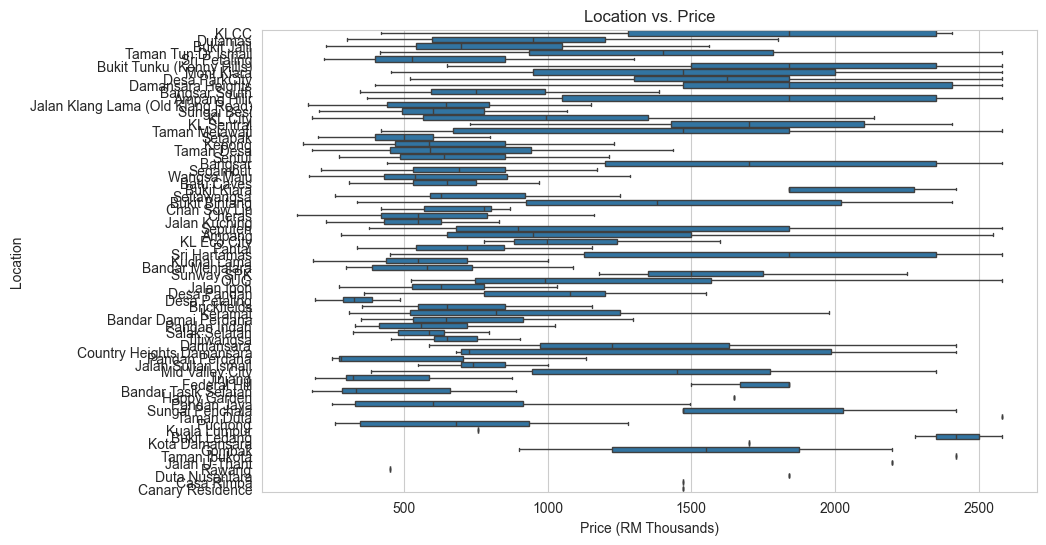

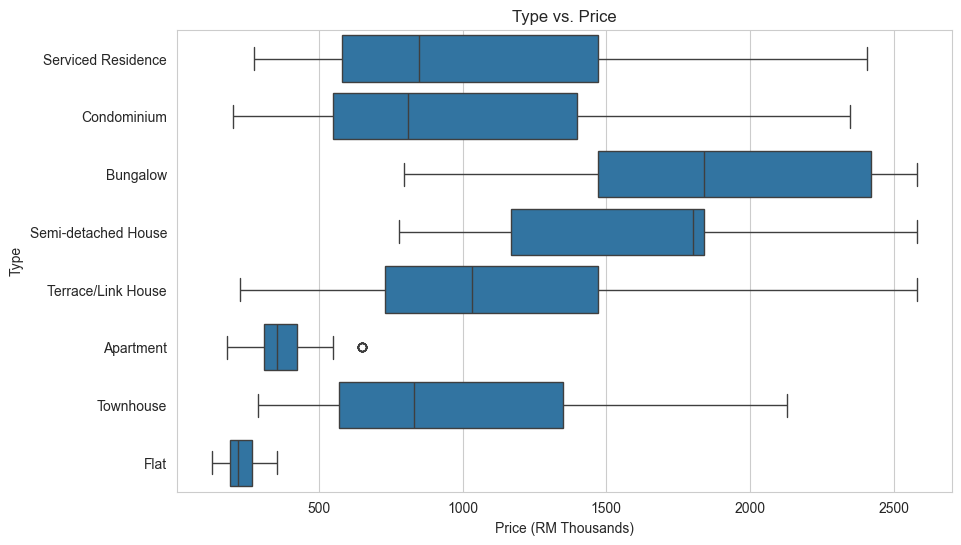

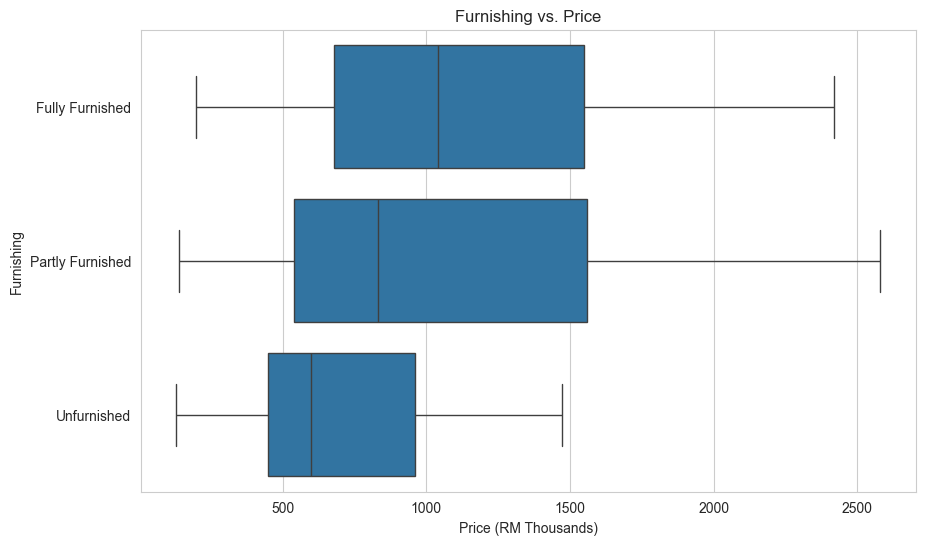

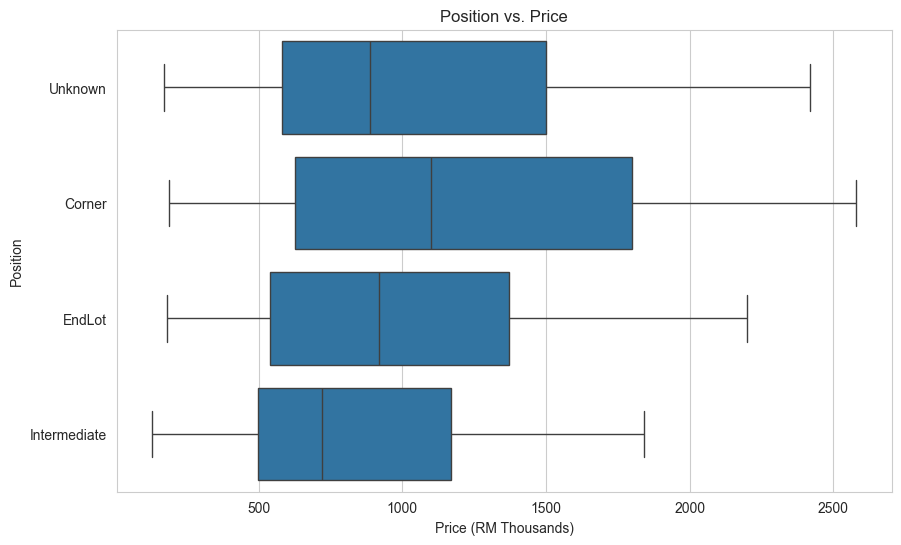

In [10]:

# Load the data
#df = pd.read_csv('../data/cleaned_data.csv')

# Basic exploration
print(df.head())  # View first few rows
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics for numerical features

# Check for missing values
print(df.isnull().sum())

# Visualize distributions
sns.histplot(df['Price']/1000, kde=True)
plt.title('Price Distribution (in thousands)')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical features
numerical_cols = ['Rooms', 'Bathrooms', 'Car Parks', 'Size', 'Storeys']
corr = df[numerical_cols + ['Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for categorical vs. Price (vertical orientation)
categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=col, x=df['Price']/1000, data=df)  # Swapped x and y, divided Price by 1000
    plt.title(f'{col} vs. Price')
    plt.xlabel('Price (RM Thousands)')  # Updated label to show thousands
    plt.ylabel(col)
    plt.show()
# Boxplots for categorical vs. Price
#categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']
#for col in categorical_cols:
    #sns.boxplot(x=col, y='Price', data=df)
   # plt.title(f'{col} vs. Price')
    #plt.xticks(rotation=45)
    #plt.show()

In [11]:
df

,Location,Type,Rooms,Bathrooms,Car Parks,Size,Furnishing,Storeys,Position,Price
0,KLCC,Serviced Residence,3,3.0,2.0,1335,Fully Furnished,1,Unknown,1250000
1,Dutamas,Condominium,3,4.0,2.0,1875,Partly Furnished,1,Corner,1030000
2,Bukit Jalil,Condominium,5,3.0,2.0,1513,Partly Furnished,1,Corner,900000
3,Taman Tun Dr Ismail,Bungalow,6,5.0,4.0,7200,Partly Furnished,1,Unknown,2420000
4,Taman Tun Dr Ismail,Semi-detached House,5,4.0,4.0,3600,Partly Furnished,1,Unknown,2420000
...,...,...,...,...,...,...,...,...,...,...
28955,Seputeh,Condominium,3,2.0,1.0,915,Partly Furnished,1,Unknown,750000
28956,KL Sentral,Condominium,4,3.0,2.0,1544,Fully Furnished,1,Corner,1400000
28957,KL Eco City,Condominium,1,1.0,1.0,650,Partly Furnished,1,Corner,880000
28958,Sri Hartamas,Condominium,6,6.0,3.0,3973,Partly Furnished,1,Corner,2350000


### Replot Histograms

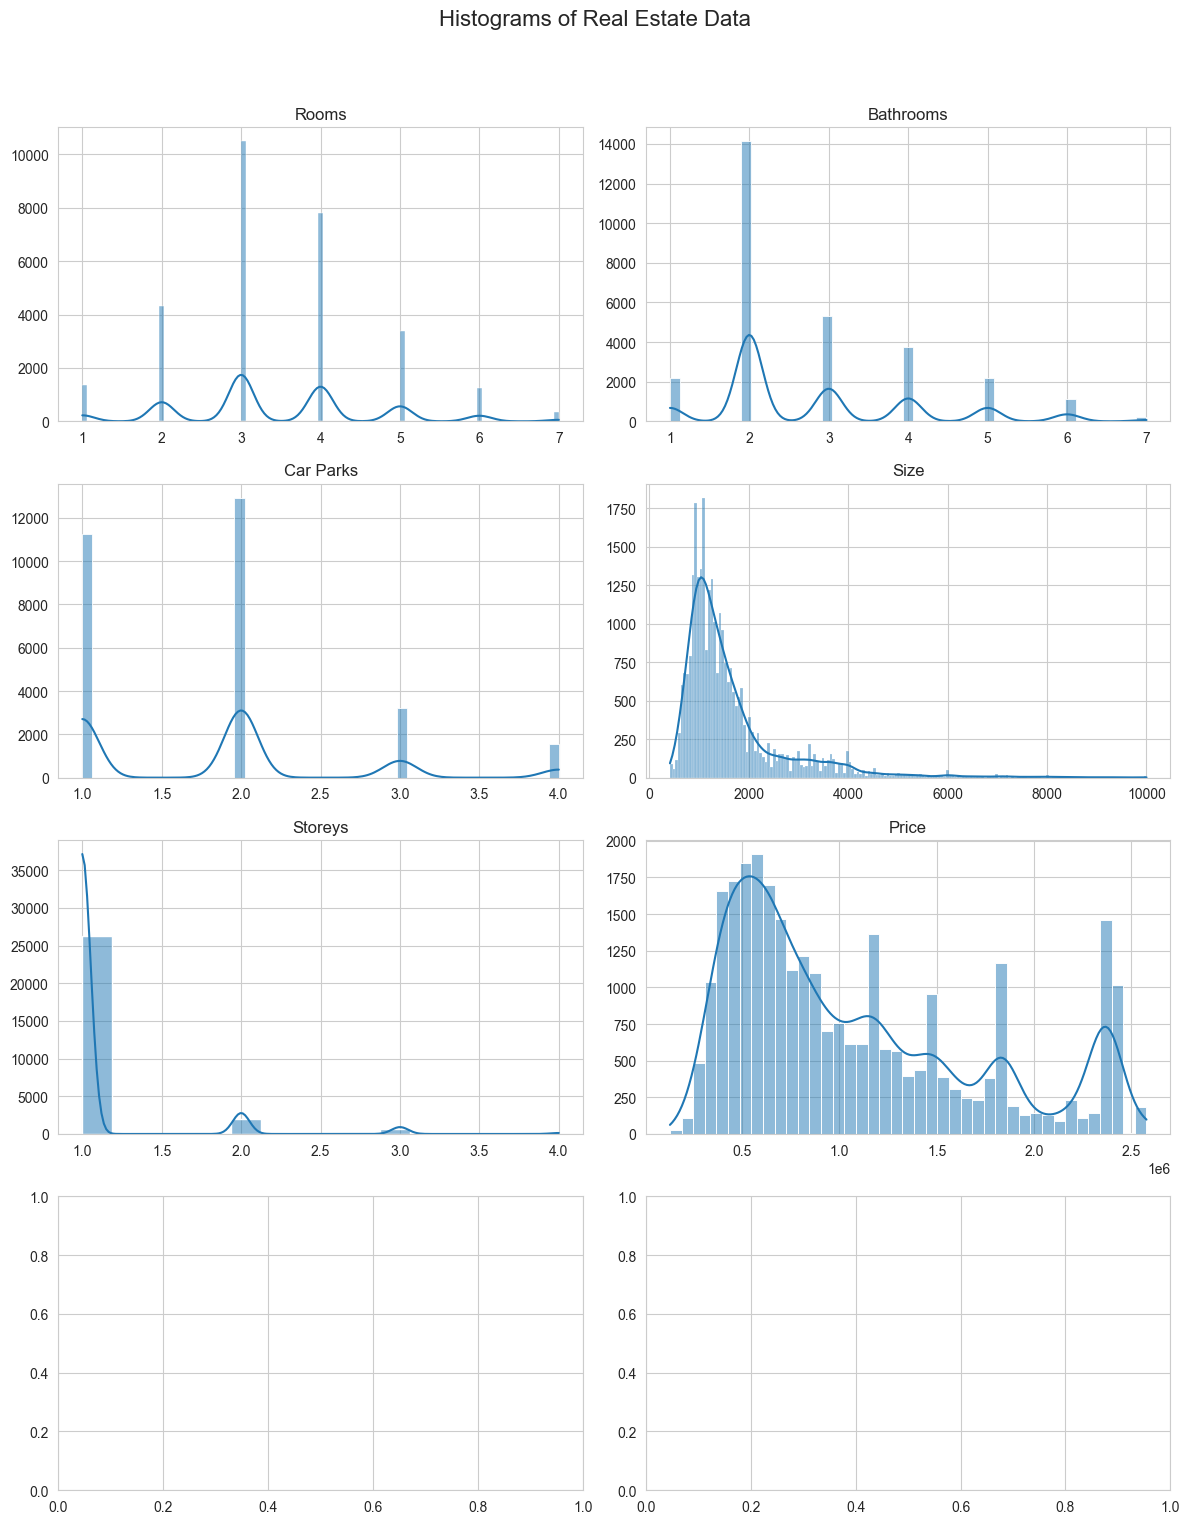

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # Changed to 4x2 grid
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['Rooms','Bathrooms', 'Car Parks', 'Size', 'Storeys', 'Price']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

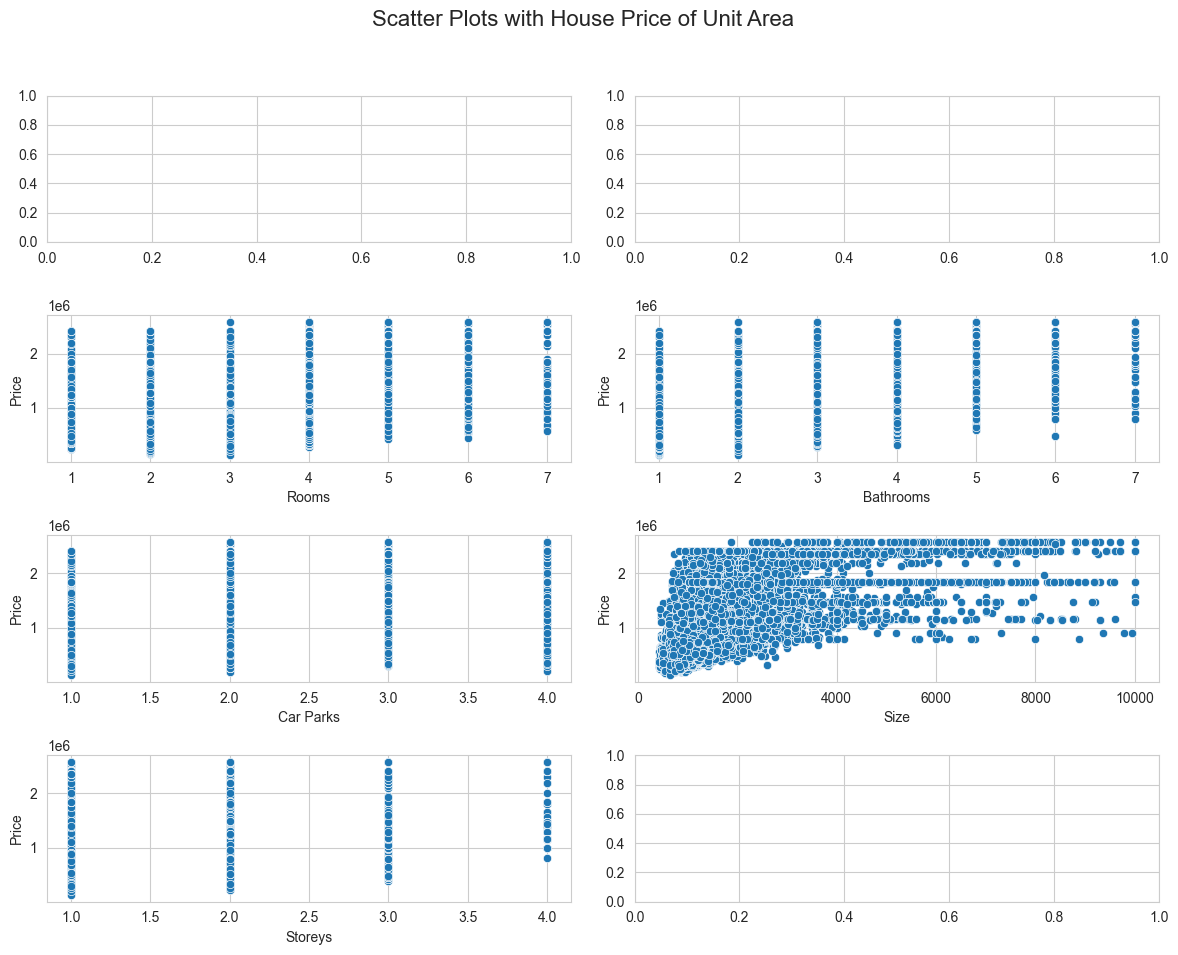

In [14]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price

sns.scatterplot(data=df, x='Rooms', y='Price', ax=axes[1, 0])
sns.scatterplot(data=df, x='Bathrooms', y='Price', ax=axes[1, 1])
sns.scatterplot(data=df, x='Car Parks', y='Price', ax=axes[2, 0])
sns.scatterplot(data=df, x='Size', y='Price', ax=axes[2, 1])
sns.scatterplot(data=df, x='Storeys', y='Price', ax=axes[3, 0])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
df

,Location,Type,Rooms,Bathrooms,Car Parks,Size,Furnishing,Storeys,Position,Price
0,KLCC,Serviced Residence,3,3.0,2.0,1335,Fully Furnished,1,Unknown,1250000
1,Dutamas,Condominium,3,4.0,2.0,1875,Partly Furnished,1,Corner,1030000
2,Bukit Jalil,Condominium,5,3.0,2.0,1513,Partly Furnished,1,Corner,900000
3,Taman Tun Dr Ismail,Bungalow,6,5.0,4.0,7200,Partly Furnished,1,Unknown,2420000
4,Taman Tun Dr Ismail,Semi-detached House,5,4.0,4.0,3600,Partly Furnished,1,Unknown,2420000
...,...,...,...,...,...,...,...,...,...,...
28955,Seputeh,Condominium,3,2.0,1.0,915,Partly Furnished,1,Unknown,750000
28956,KL Sentral,Condominium,4,3.0,2.0,1544,Fully Furnished,1,Corner,1400000
28957,KL Eco City,Condominium,1,1.0,1.0,650,Partly Furnished,1,Corner,880000
28958,Sri Hartamas,Condominium,6,6.0,3.0,3973,Partly Furnished,1,Corner,2350000


Number of records remaining: 28321


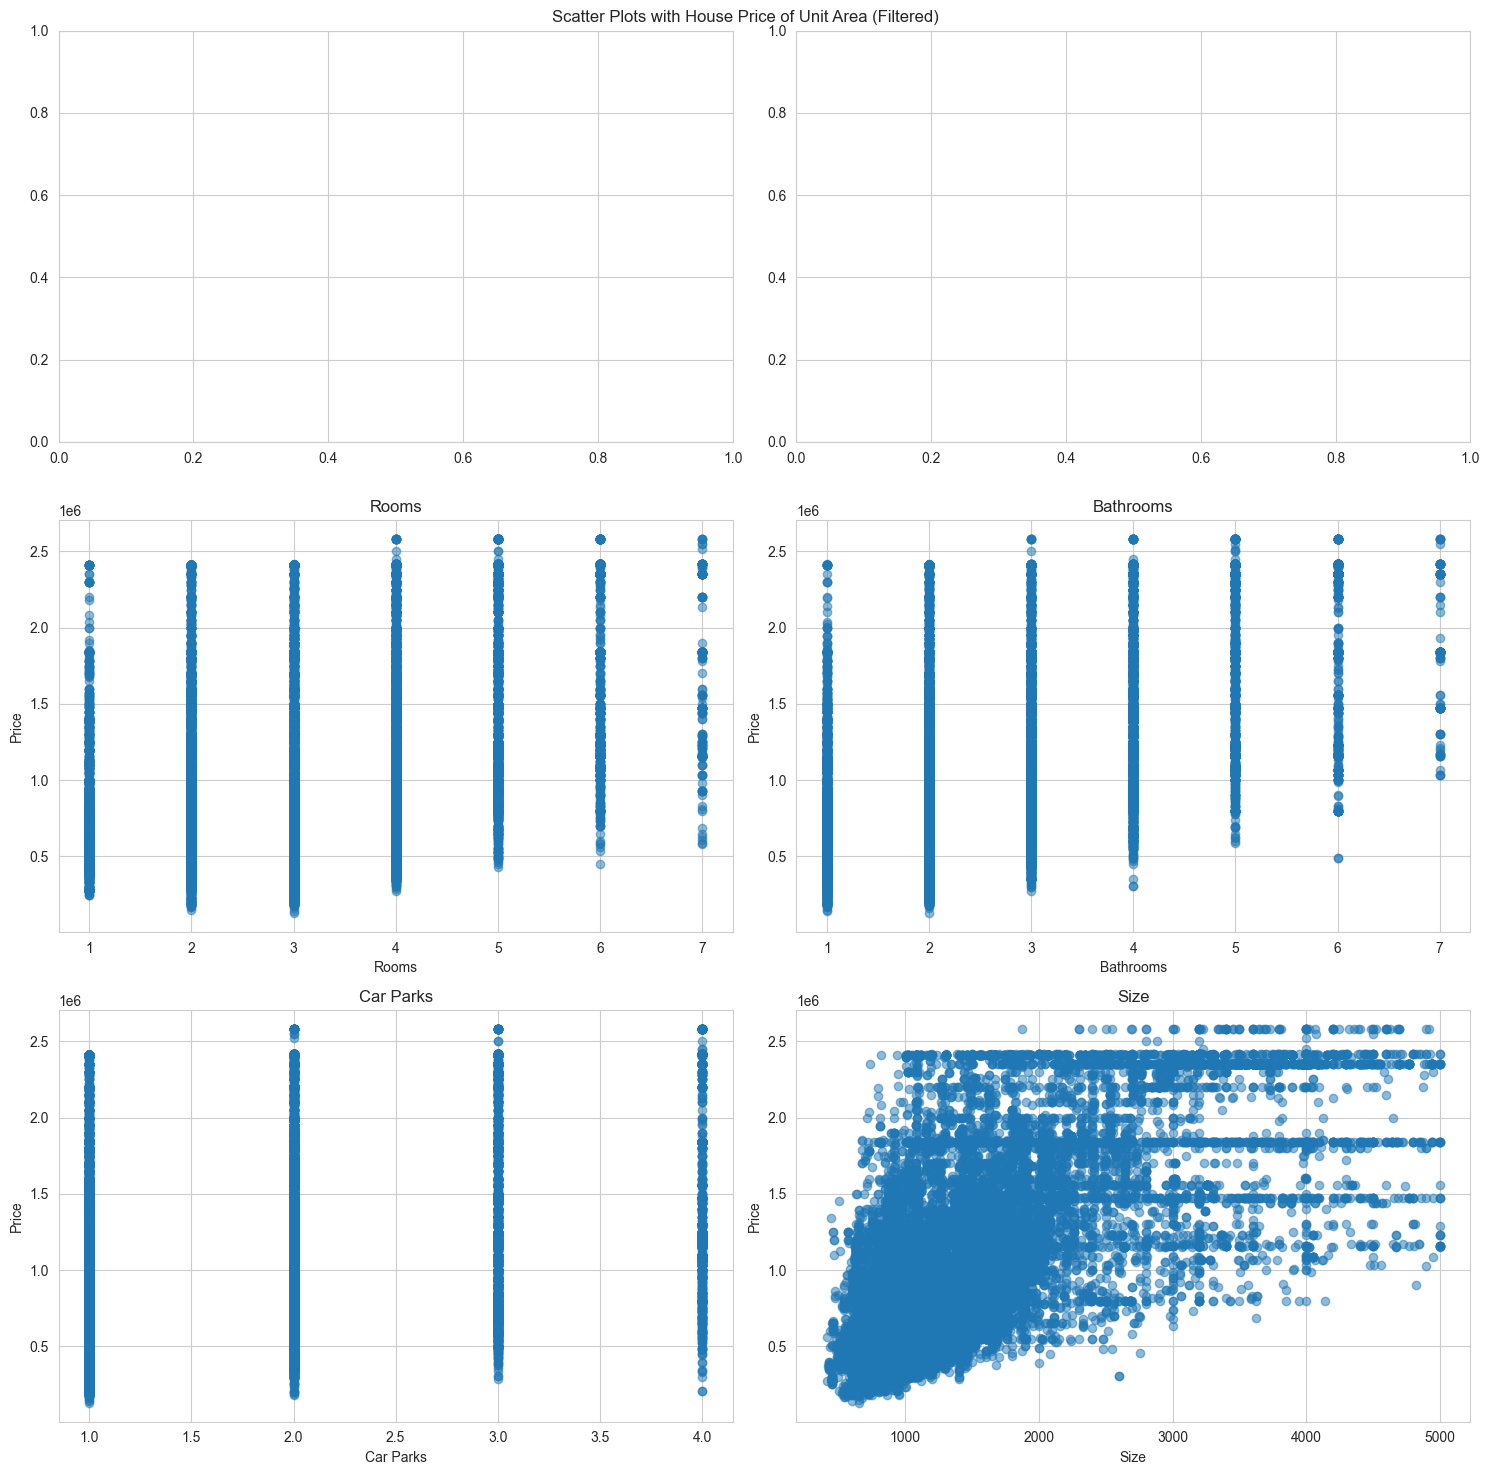

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to remove outliers based on the specified criteria
df_filtered = df[(df['Rooms'] <= 7) & 
                 (df['Bathrooms'] <= 7) & 
                 (df['Car Parks'] <= 7) & 
                 (df['Size'] <= 5000)]

# Print the number of records remaining
print(f"Number of records remaining: {len(df_filtered)}")

# Create scatter plots for the filtered data
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Scatter Plots with House Price of Unit Area (Filtered)')


# Rooms vs Price
axes[1, 0].scatter(df_filtered['Rooms'], df_filtered['Price'], alpha=0.5)
axes[1, 0].set_xlabel('Rooms')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Rooms')

# Bathrooms vs Price
axes[1, 1].scatter(df_filtered['Bathrooms'], df_filtered['Price'], alpha=0.5)
axes[1, 1].set_xlabel('Bathrooms')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Bathrooms')

# Car Parks vs Price
axes[2, 0].scatter(df_filtered['Car Parks'], df_filtered['Price'], alpha=0.5)
axes[2, 0].set_xlabel('Car Parks')
axes[2, 0].set_ylabel('Price')
axes[2, 0].set_title('Car Parks')

# Size vs Price
axes[2, 1].scatter(df_filtered['Size'], df_filtered['Price'], alpha=0.5)
axes[2, 1].set_xlabel('Size')
axes[2, 1].set_ylabel('Price')
axes[2, 1].set_title('Size')

plt.tight_layout()
plt.show()

In [17]:
df_filtered

,Location,Type,Rooms,Bathrooms,Car Parks,Size,Furnishing,Storeys,Position,Price
0,KLCC,Serviced Residence,3,3.0,2.0,1335,Fully Furnished,1,Unknown,1250000
1,Dutamas,Condominium,3,4.0,2.0,1875,Partly Furnished,1,Corner,1030000
2,Bukit Jalil,Condominium,5,3.0,2.0,1513,Partly Furnished,1,Corner,900000
4,Taman Tun Dr Ismail,Semi-detached House,5,4.0,4.0,3600,Partly Furnished,1,Unknown,2420000
5,Taman Tun Dr Ismail,Terrace/Link House,5,4.0,3.0,1875,Partly Furnished,2,EndLot,1950000
...,...,...,...,...,...,...,...,...,...,...
28955,Seputeh,Condominium,3,2.0,1.0,915,Partly Furnished,1,Unknown,750000
28956,KL Sentral,Condominium,4,3.0,2.0,1544,Fully Furnished,1,Corner,1400000
28957,KL Eco City,Condominium,1,1.0,1.0,650,Partly Furnished,1,Corner,880000
28958,Sri Hartamas,Condominium,6,6.0,3.0,3973,Partly Furnished,1,Corner,2350000


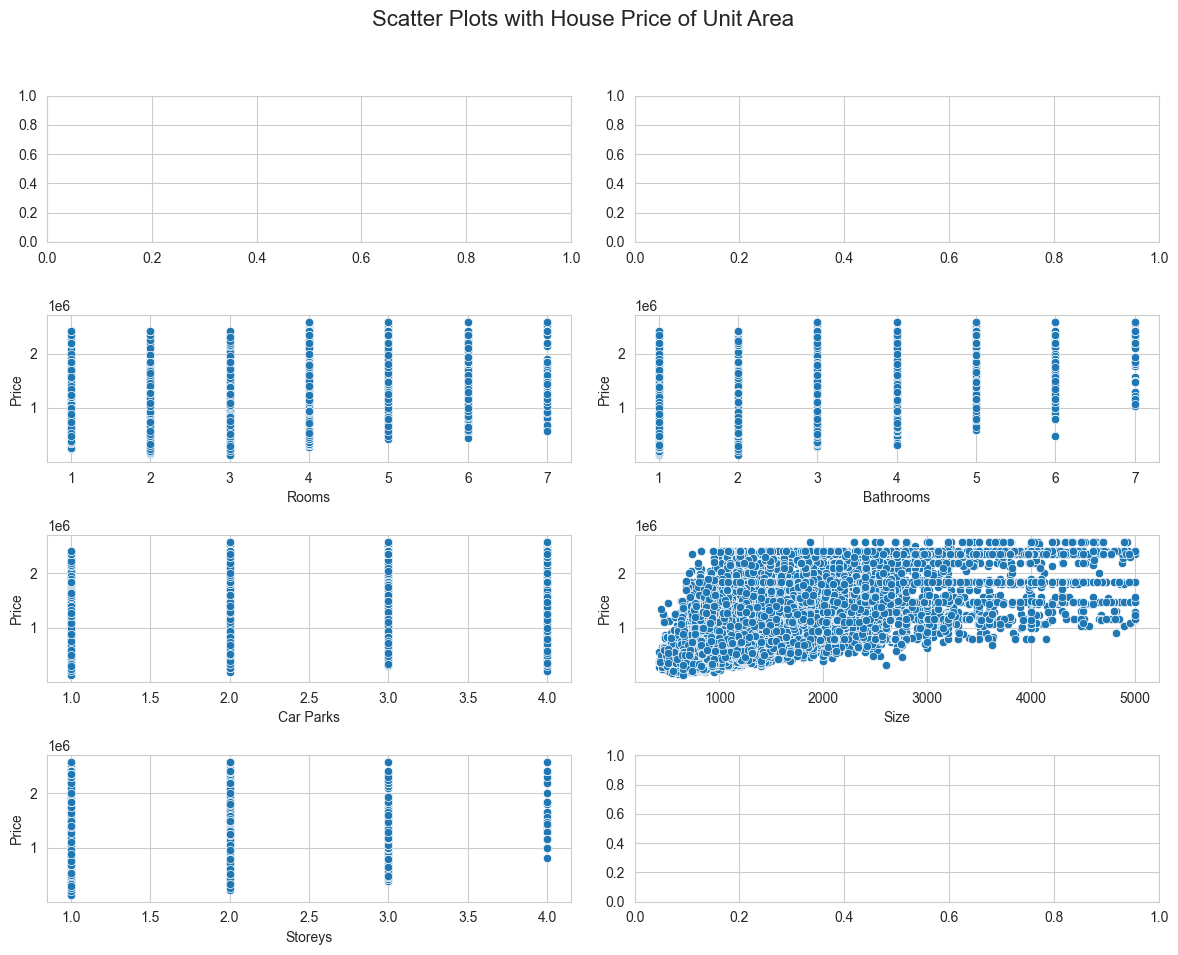

In [18]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price

sns.scatterplot(data=df_filtered, x='Rooms', y='Price', ax=axes[1, 0])
sns.scatterplot(data=df_filtered, x='Bathrooms', y='Price', ax=axes[1, 1])
sns.scatterplot(data=df_filtered, x='Car Parks', y='Price', ax=axes[2, 0])
sns.scatterplot(data=df_filtered, x='Size', y='Price', ax=axes[2, 1])
sns.scatterplot(data=df_filtered, x='Storeys', y='Price', ax=axes[3, 0])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

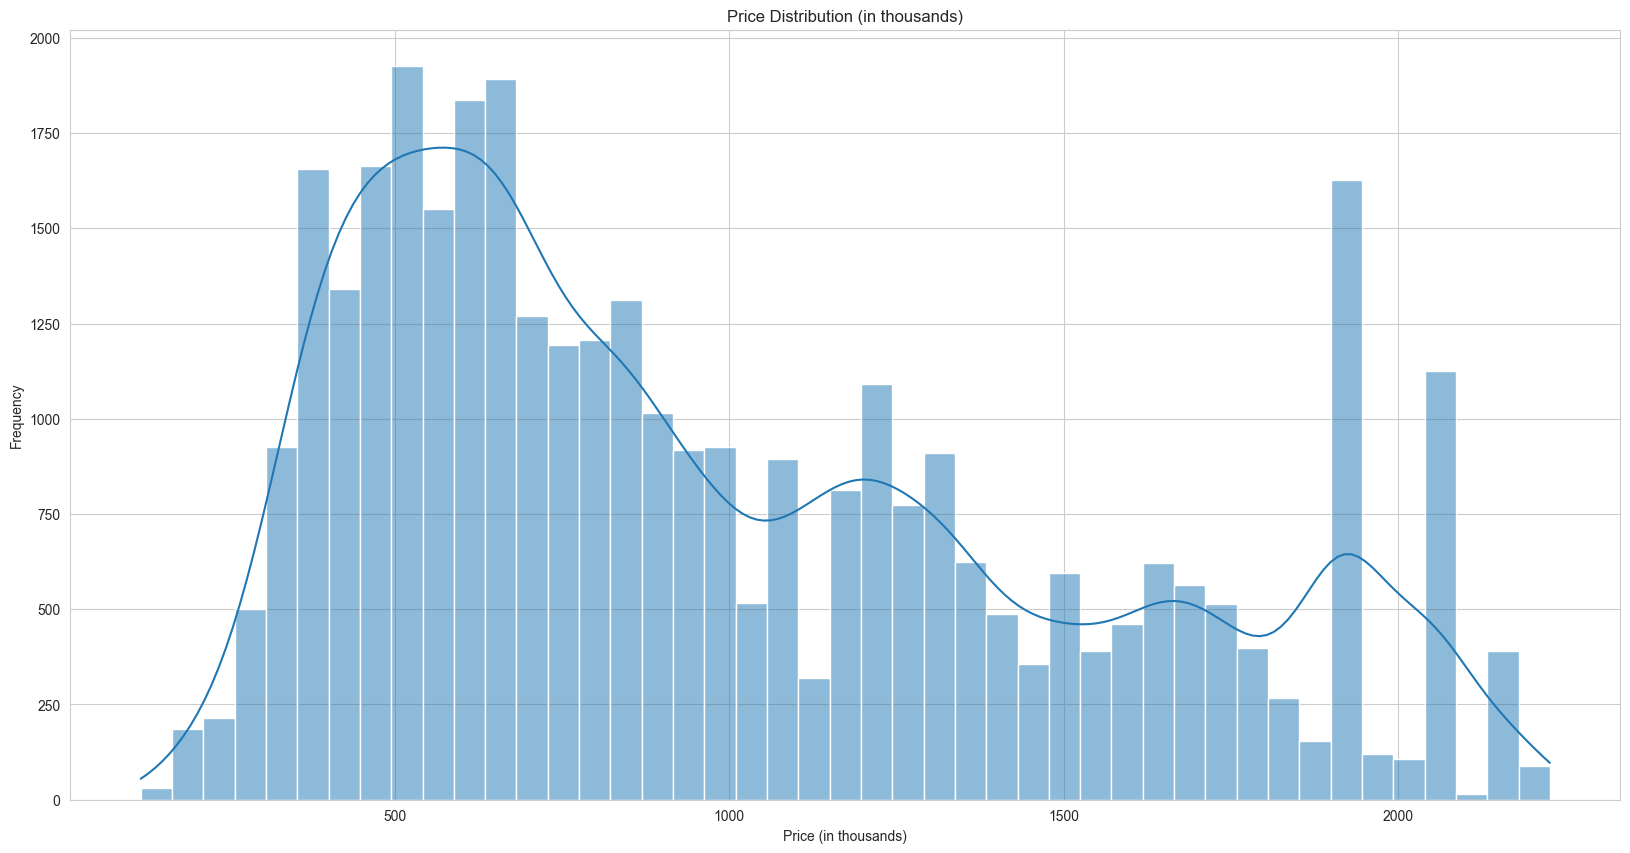

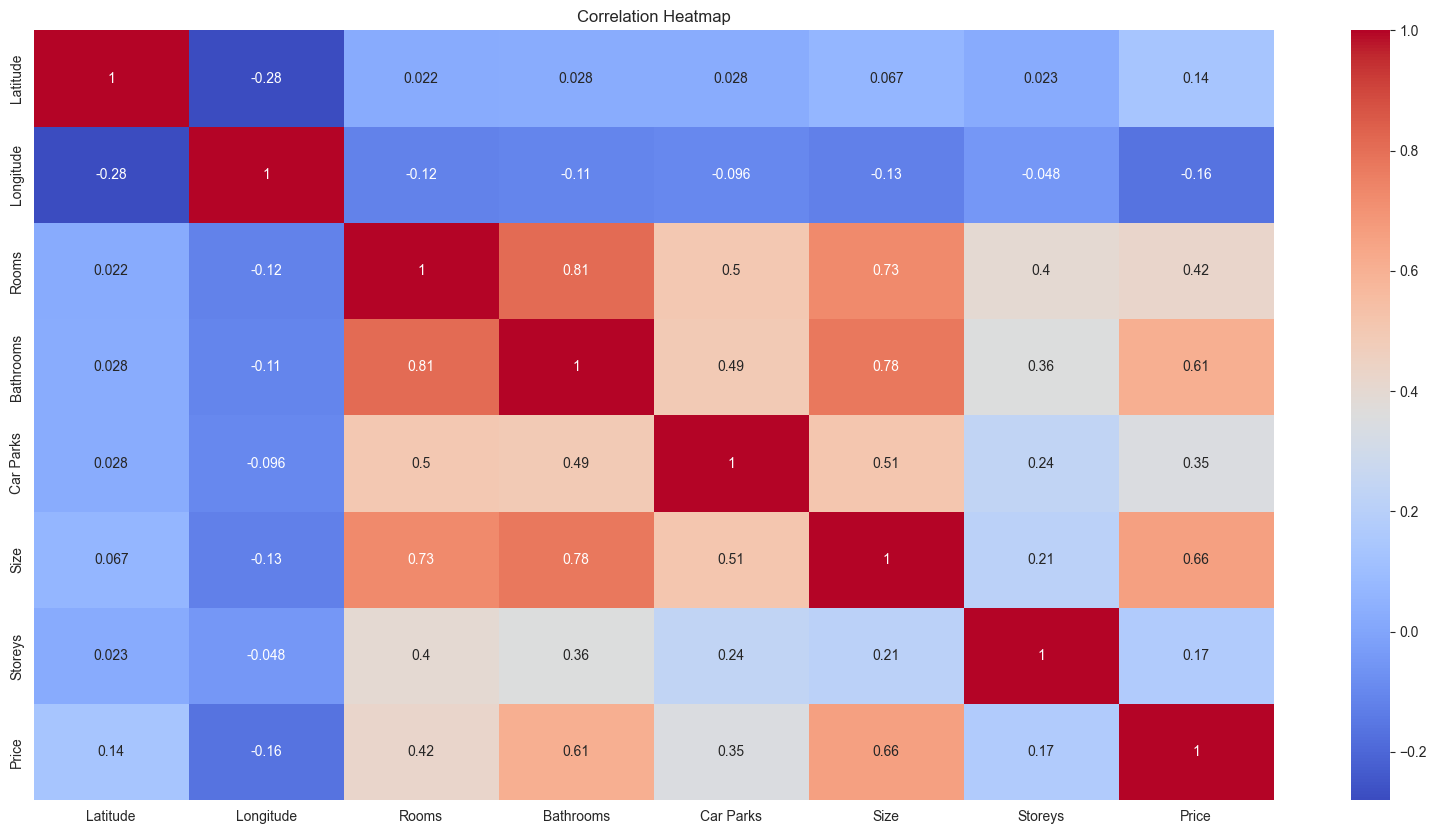

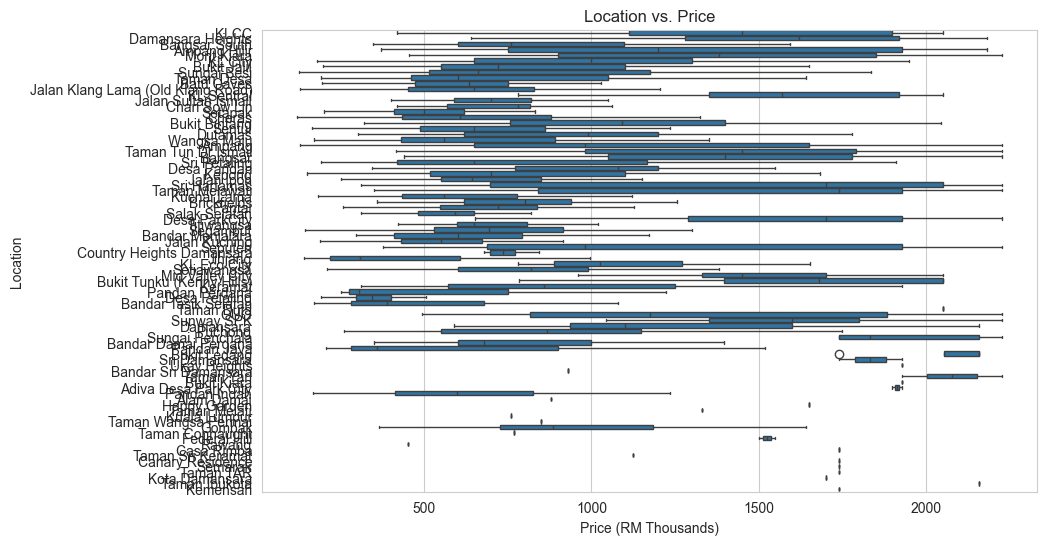

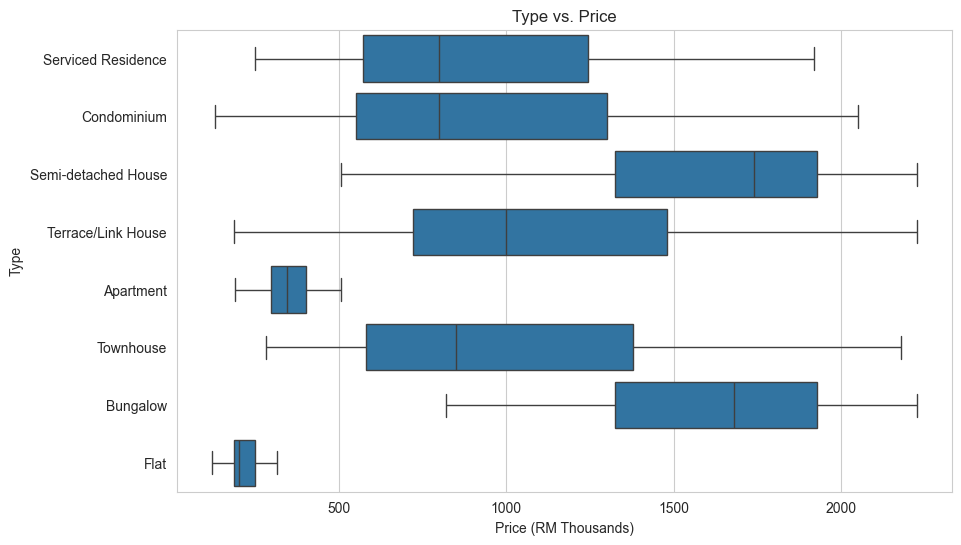

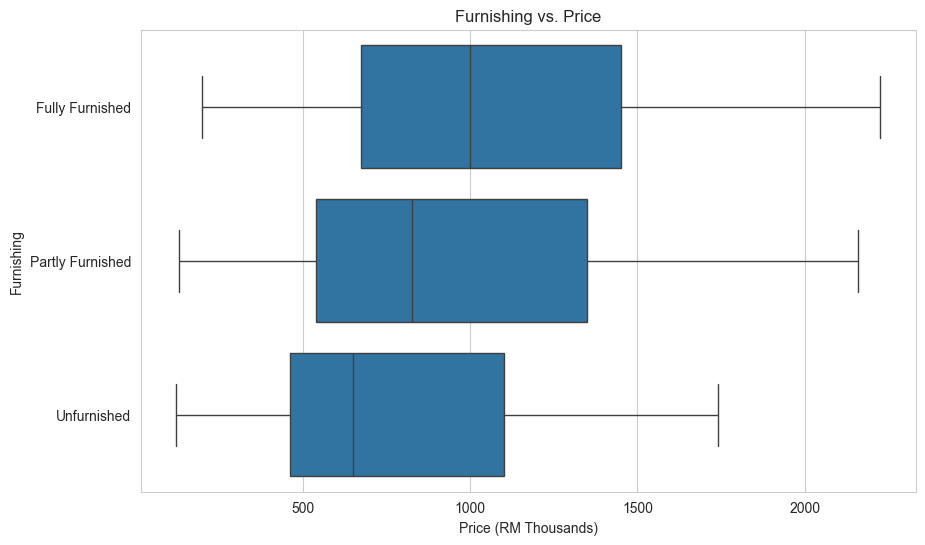

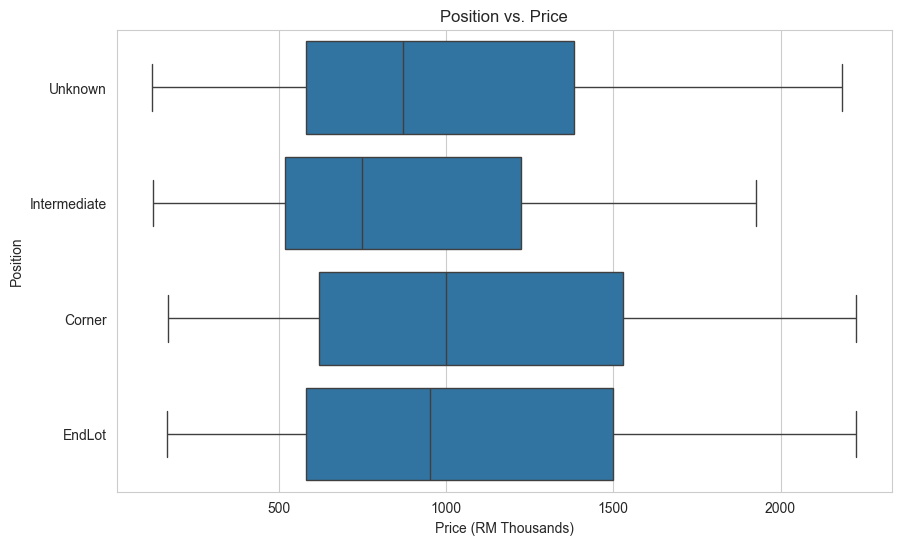

In [49]:



# Visualize distributions
sns.histplot(df_filtered['Price']/1000, kde=True)
plt.title('Price Distribution (in thousands)')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical features
numerical_cols = ['Latitude', 'Longitude', 'Rooms', 'Bathrooms', 'Car Parks', 'Size', 'Storeys']
corr = df_filtered[numerical_cols + ['Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for categorical vs. Price (vertical orientation)
categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=col, x=df['Price']/1000, data=df)  # Swapped x and y, divided Price by 1000
    plt.title(f'{col} vs. Price')
    plt.xlabel('Price (RM Thousands)')  # Updated label to show thousands
    plt.ylabel(col)
    plt.show()
# Boxplots for categorical vs. Price
#categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']
#for col in categorical_cols:
    #sns.boxplot(x=col, y='Price', data=df)
   # plt.title(f'{col} vs. Price')
    #plt.xticks(rotation=45)
    #plt.show()

In [57]:
df_filtered.to_csv('../data/filtered_data.csv', index=False)


In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop irrelevant columns if needed (e.g., if Latitude/Longitude are redundant with Location)
# df_filtered = df_filtered.drop(['Latitude', 'Longitude'], axis=1)  # Optional, based on EDA

# Handle outliers (example: cap Price at 99th percentile)
price_cap = df_filtered['Price'].quantile(0.99)
df_filtered['Price'] = df_filtered['Price'].clip(upper=price_cap)

# Define features and target
X = df_filtered.drop('Price', axis=1)
y = df_filtered['Price']

# Preprocessing pipeline
numerical_cols = ['Rooms', 'Bathrooms', 'Car Parks', 'Size', 'Storeys']  # Adjust based on your data
categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle any missing numerics
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categoricals
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ]
)

# Apply preprocessing (fit on full data for now; we'll split next)
X_preprocessed = preprocessor.fit_transform(X)

/var/folders/jz/qnw53gdj78gf890hm1ymp5r00000gn/T/ipykernel_40058/2350338658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price'] = df_filtered['Price'].clip(upper=price_cap)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    return rmse, r2, cv_rmse

# Train and compare
results = {}
for name, model in models.items():
    rmse, r2, cv_rmse = evaluate_model(model, X_train, y_train, X_val, y_val)
    results[name] = {'RMSE': rmse, 'R2': r2, 'CV RMSE': cv_rmse}
    print(f'{name}: RMSE={rmse:.2f}, R2={r2:.2f}, CV RMSE={cv_rmse:.2f}')

# Display results in a table
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression: RMSE=250995.09, R2=0.83, CV RMSE=253194.02
Random Forest: RMSE=144333.86, R2=0.94, CV RMSE=152475.93
Gradient Boosting: RMSE=227071.19, R2=0.86, CV RMSE=225417.37
SVR: RMSE=639297.54, R2=-0.08, CV RMSE=648929.13
                            RMSE        R2        CV RMSE
Linear Regression  250995.088800  0.833270  253194.019615
Random Forest      144333.855229  0.944866  152475.933881
Gradient Boosting  227071.186793  0.863540  225417.366546
SVR                639297.537632 -0.081654  648929.127310


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import joblib

# Load data (replace with your actual data loading)
df = pd.read_csv('../data/cleaned_data.csv')
X = df.drop('Price', axis=1)
y = df['Price']

# Assuming preprocessor is defined as in Step 3
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numerical_cols = ['Latitude', 'Longitude', 'Rooms', 'Bathrooms', 'Car Parks', 'Size', 'Storeys']
categorical_cols = ['Location', 'Type', 'Furnishing', 'Position']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ]
)

# Split data (as in Step 4)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Dictionary to store best models
best_models = {}

# 1. Linear Regression Tuning
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
lr_param_grid = {
    'model__fit_intercept': [True, False],  # Whether to include intercept
    'model__copy_X': [True, False]  # Whether to copy X or overwrite
}
lr_grid_search = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
lr_grid_search.fit(X_train, y_train)
best_lr = lr_grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_val)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
r2_lr = r2_score(y_val, y_pred_lr)
best_models['Linear Regression'] = {
    'model': best_lr,
    'params': lr_grid_search.best_params_,
    'RMSE': rmse_lr,
    'R2': r2_lr
}
print(f"Linear Regression - Best Params: {lr_grid_search.best_params_}")
print(f"Linear Regression - Val RMSE: {rmse_lr:.2f}, Val R2: {r2_lr:.2f}")

# 2. Random Forest Tuning
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)
best_models['Random Forest'] = {
    'model': best_rf,
    'params': rf_grid_search.best_params_,
    'RMSE': rmse_rf,
    'R2': r2_rf
}
print(f"Random Forest - Best Params: {rf_grid_search.best_params_}")
print(f"Random Forest - Val RMSE: {rmse_rf:.2f}, Val R2: {r2_rf:.2f}")

# 3. Gradient Boosting Tuning
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(random_state=42))])
gb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10]
}
gb_grid_search = GridSearchCV(
    gb_pipeline,
    gb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
gb_grid_search.fit(X_train, y_train)
best_gb = gb_grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_val)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
r2_gb = r2_score(y_val, y_pred_gb)
best_models['Gradient Boosting'] = {
    'model': best_gb,
    'params': gb_grid_search.best_params_,
    'RMSE': rmse_gb,
    'R2': r2_gb
}
print(f"Gradient Boosting - Best Params: {gb_grid_search.best_params_}")
print(f"Gradient Boosting - Val RMSE: {rmse_gb:.2f}, Val R2: {r2_gb:.2f}")

# Compare tuned results
results_df = pd.DataFrame({
    'Model': [name for name in best_models.keys()],
    'Val RMSE': [best_models[name]['RMSE'] for name in best_models.keys()],
    'Val R2': [best_models[name]['R2'] for name in best_models.keys()]
})
print("\nTuned Model Comparison:")
print(results_df)

# Select and save the best model
best_model_name = results_df.loc[results_df['Val RMSE'].idxmin()]['Model']
best_model = best_models[best_model_name]['model']
joblib.dump(best_model, 'property_price_model.pkl')
print(f"\nBest Model Selected: {best_model_name}")

Linear Regression - Best Params: {'model__copy_X': True, 'model__fit_intercept': False}
Linear Regression - Val RMSE: 814898.67, Val R2: 0.78


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest - Best Params: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Random Forest - Val RMSE: 564532.52, Val R2: 0.89
Gradient Boosting - Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Gradient Boosting - Val RMSE: 568221.30, Val R2: 0.89

Tuned Model Comparison:
               Model       Val RMSE    Val R2
0  Linear Regression  814898.672643  0.776370
1      Random Forest  564532.517899  0.892675
2  Gradient Boosting  568221.301266  0.891268

Best Model Selected: Random Forest


In [55]:
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
print(f'Final Test RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}')

Final Test RMSE: 497887.71, R2: 0.91


In [58]:
# -------------------------------------------------
# 8. FINAL TEST-SET EVALUATION
# -------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Re-fit the *absolute* best model on the combined train+val set
# (optional but gives the model the most data before final scoring)
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

final_model = best_models[best_model_name]['model']   # already a Pipeline
final_model.fit(X_train_val, y_train_val)            # re-train on train+val

# Predict on the **held-out test set**
y_test_pred = final_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2   = r2_score(y_test, y_test_pred)

print("\n" + "="*50)
print("FINAL TEST-SET PERFORMANCE")
print("="*50)
print(f"Model: {best_model_name}")
print(f"Test RMSE : {test_rmse:,.0f}")
print(f"Test R²   : {test_r2:.4f}")
print("="*50)

# Save the *final* model (trained on train+val)
joblib.dump(final_model, 'property_price_model_final.pkl')
print("Final model saved as 'property_price_model_final.pkl'")


FINAL TEST-SET PERFORMANCE
Model: Random Forest
Test RMSE : 485,183
Test R²   : 0.9132
Final model saved as 'property_price_model_final.pkl'


In [59]:
import joblib
joblib.dump(best_model, 'property_price_model.pkl')

['property_price_model.pkl']